### Wine Project

Data Import:

In [61]:
import pandas as pd

red_path = './data/winequality-red.csv'
white_path = './data/winequality-white.csv'

red_dataset = pd.read_csv(red_path, header=0, sep=';')
white_dataset = pd.read_csv(white_path, header=0, sep=';')

## Task 1 Exploring the data:

In [62]:
display(red_dataset.describe())
display(red_dataset.head())
display(white_dataset.describe())
display(white_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## White wine data:

<Figure size 1000x600 with 0 Axes>

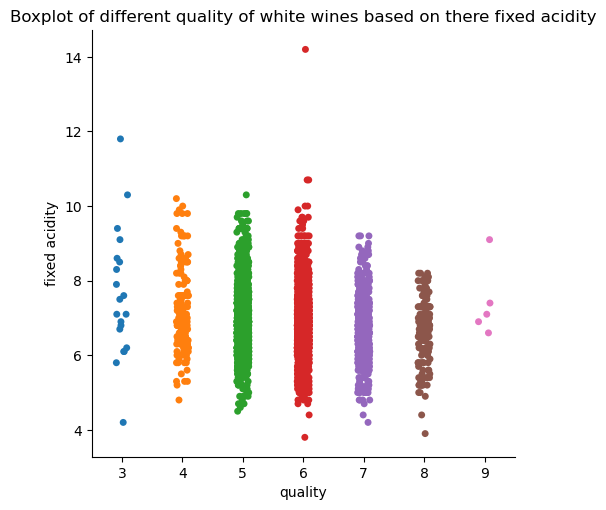

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (10, 6))
sns.catplot(x = "quality", y = "fixed acidity", data = white_dataset, kind = "strip")
plt.title("Boxplot of different quality of white wines based on there fixed acidity")
plt.xlabel("quality")
plt.ylabel("fixed acidity")
plt.show()
plt.close()


<Figure size 1000x600 with 0 Axes>

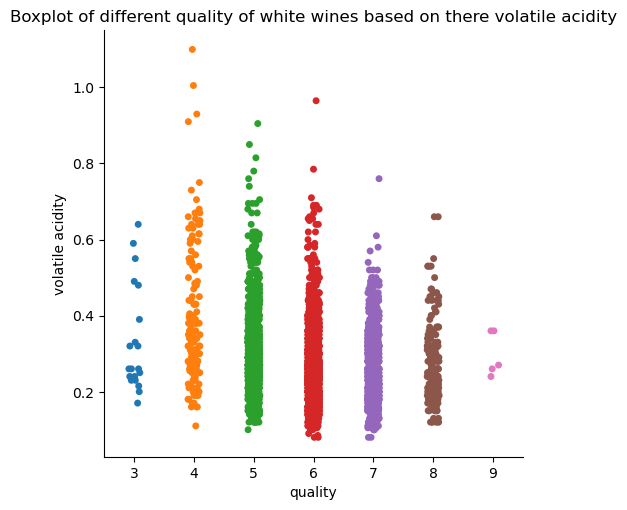

In [88]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "quality", y = "volatile acidity", data = white_dataset, kind = "strip")
plt.title("Boxplot of different quality of white wines based on there volatile acidity")
plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

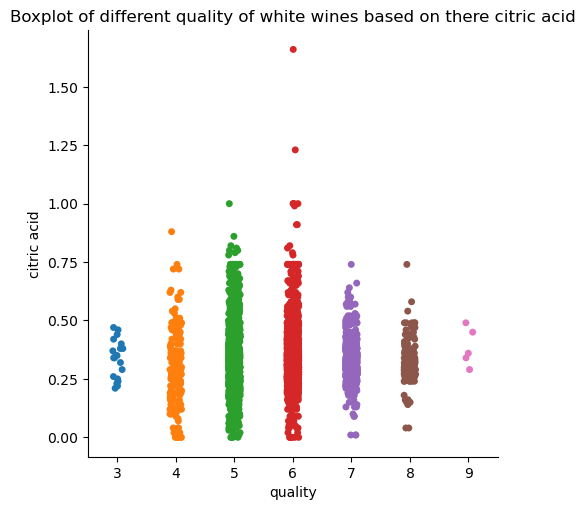

In [89]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "quality", y = "citric acid", data = white_dataset, kind = "strip")
plt.title("Boxplot of different quality of white wines based on there citric acid")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

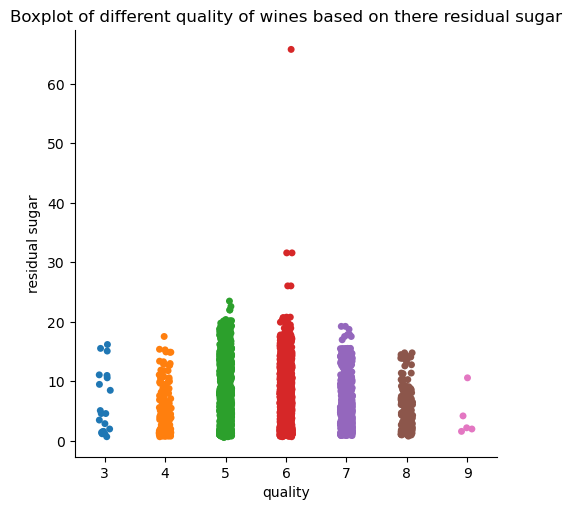

In [90]:

plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="residual sugar", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there residual sugar")
plt.xlabel("quality")
plt.ylabel("residual sugar")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

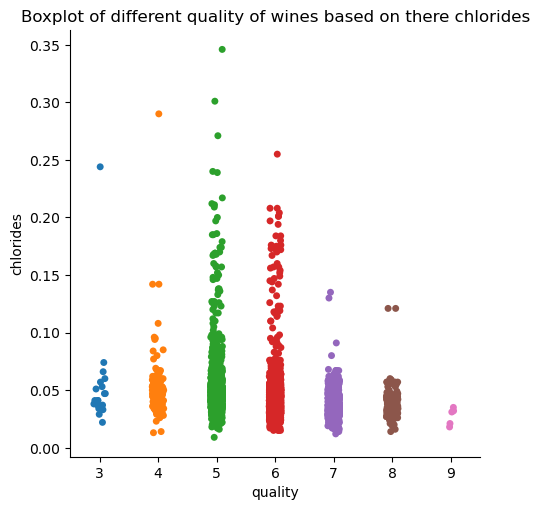

In [91]:

plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="chlorides", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there chlorides")
plt.xlabel("quality")
plt.ylabel("chlorides")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

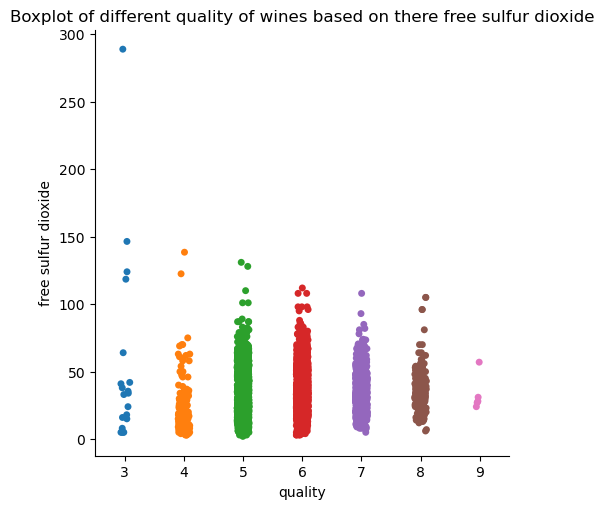

In [92]:
plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="free sulfur dioxide", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there free sulfur dioxide")
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

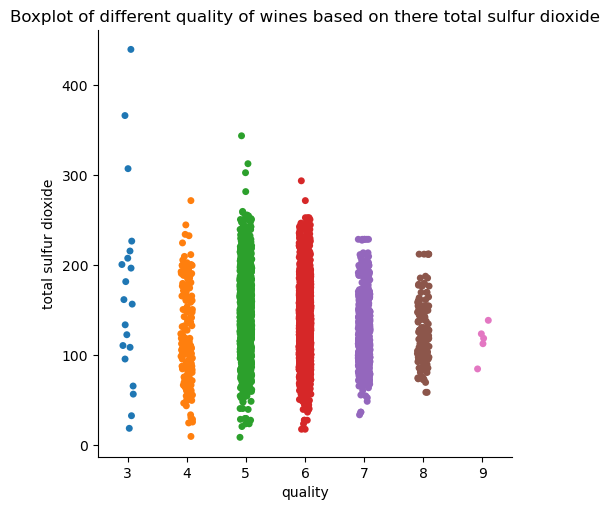

In [93]:

plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="total sulfur dioxide", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there total sulfur dioxide")
plt.xlabel("quality")
plt.ylabel("total sulfur dioxide")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

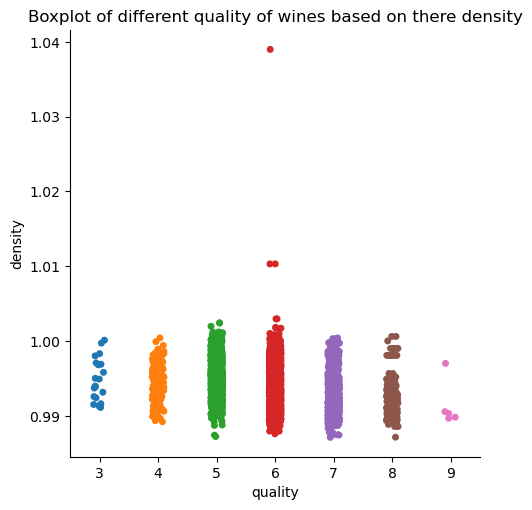

In [97]:

plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="density", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there density")
plt.xlabel("quality")
plt.ylabel("density")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

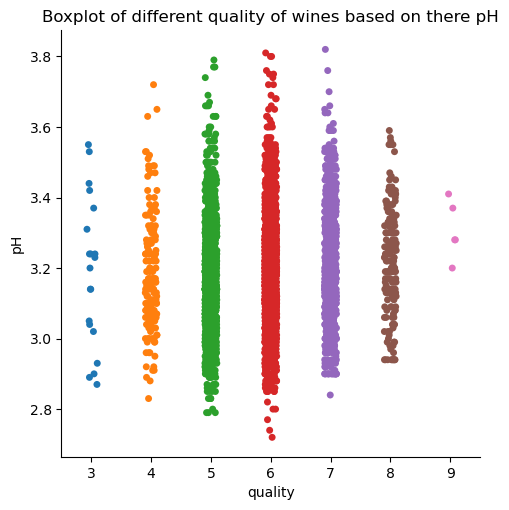

In [94]:
plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="pH", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there pH")
plt.xlabel("quality")
plt.ylabel("pH")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

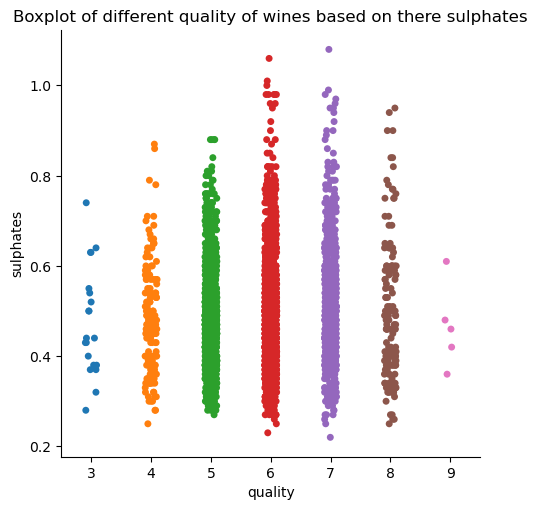

In [95]:
plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="sulphates", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there sulphates")
plt.xlabel("quality")
plt.ylabel("sulphates")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

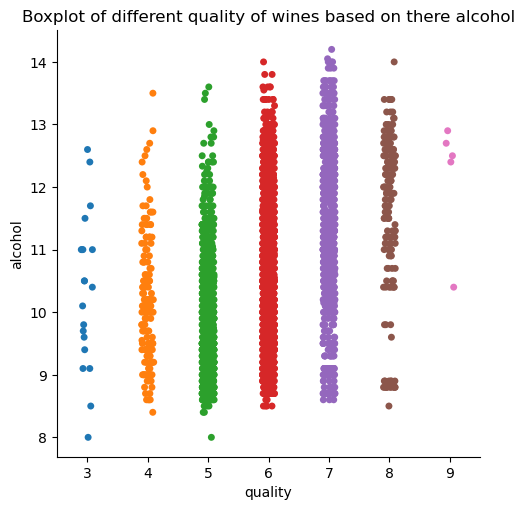

In [96]:
plt.close()
plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="alcohol", data=white_dataset, kind="strip")
plt.title("Boxplot of different quality of wines based on there alcohol")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()
plt.close()

## Red Wine Data

<Figure size 1000x600 with 0 Axes>

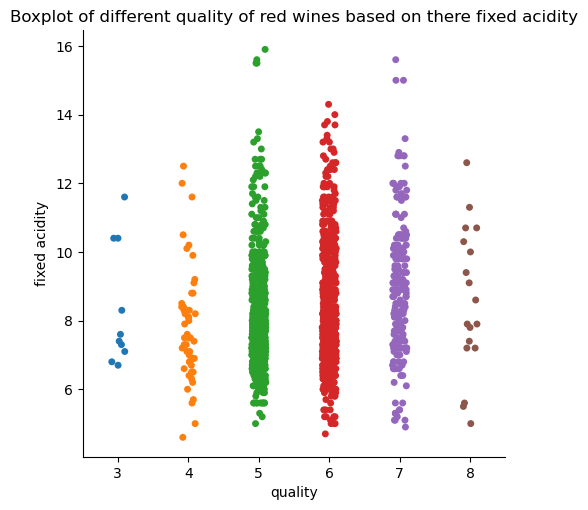

In [99]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "quality", y = "fixed acidity", data = red_dataset, kind = "strip")
plt.title("Boxplot of different quality of red wines based on there fixed acidity")
plt.xlabel("quality")
plt.ylabel("fixed acidity")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

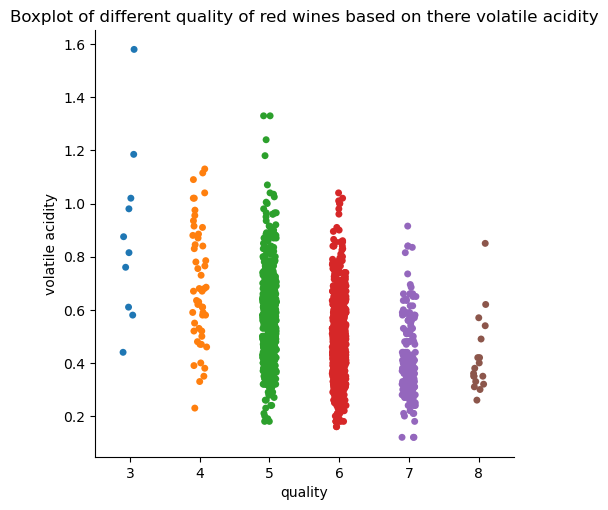

In [100]:

plt.figure(figsize=(10, 6))
sns.catplot(x="quality", y="volatile acidity", data=red_dataset, kind="strip")
plt.title("Boxplot of different quality of red wines based on there volatile acidity")
plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

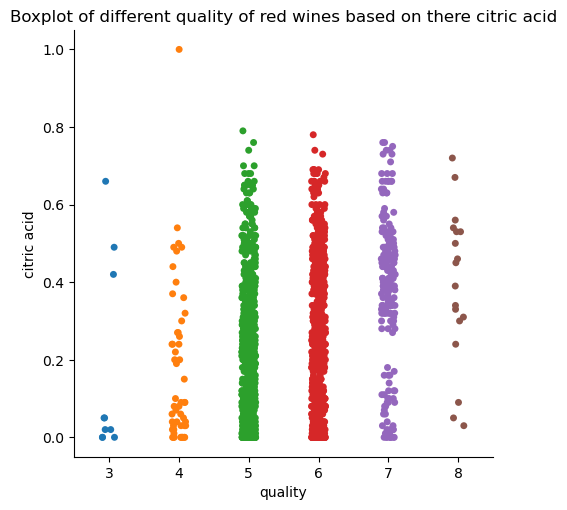

In [101]:
plt.figure(figsize = (10, 6))
sns.catplot(x = "quality", y = "citric acid", data = red_dataset, kind = "strip")
plt.title("Boxplot of different quality of red wines based on there citric acid")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()
plt.close()